In [11]:
from google.colab import files
uploaded = files.upload()


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

accent = pd.read_csv(next(iter(uploaded)))

Saving speakers_all.csv to speakers_all (1).csv


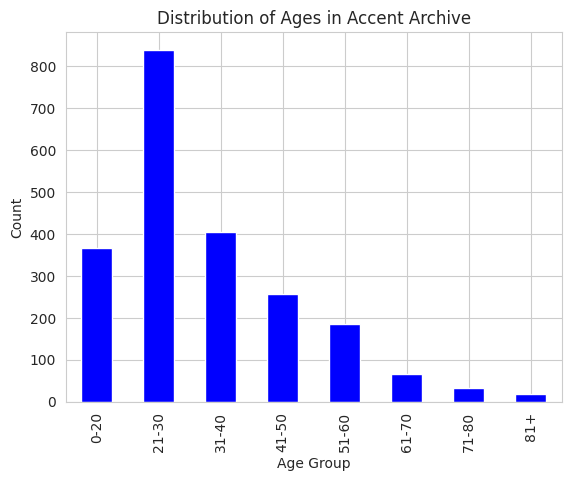

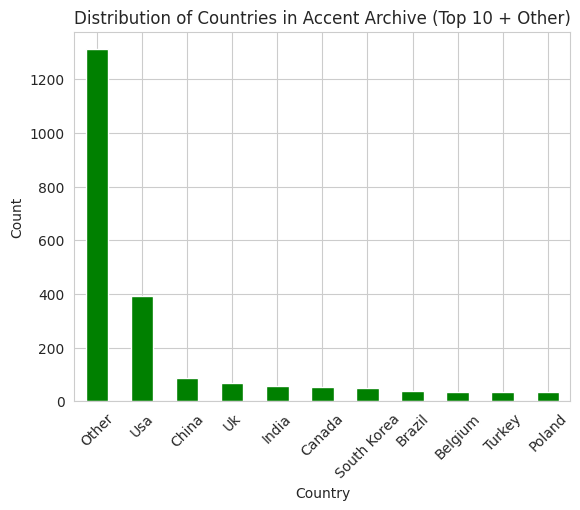

In [17]:
# age plot (binned)
accent['age'] = pd.to_numeric(accent['age'], errors='coerce')
accent = accent[accent['age'].notna()]

bins = [0, 20, 30, 40, 50, 60, 70, 80, 100]
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81+']
accent['age_group'] = pd.cut(accent['age'], bins=bins, labels=labels, right=True)

accent['age_group'].value_counts().sort_index().plot(kind='bar', color='blue')
plt.title("Distribution of Ages in Accent Archive")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.show()

# country plot
accent['country_clean'] = accent['country'].str.strip().str.title()
accent = accent[accent['country_clean'].notna() & (accent['country_clean'] != '')]

top_countries = accent['country_clean'].value_counts().nlargest(10).index
accent['country_final'] = accent['country_clean'].apply(lambda x: x if x in top_countries else 'Other')

accent['country_final'].value_counts().plot(kind='bar', color='green')
plt.title("Distribution of Countries in Accent Archive (Top 10 + Other)")
plt.xlabel("Country")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()